In [1]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load data
df_raw = pd.read_csv('train.csv')
df_raw['date_time'] = pd.to_datetime(df_raw['date_time'])
df_raw['hour'] = df_raw['date_time'].dt.hour
df_raw.set_index('date_time', inplace=True)

# Assuming the columns 'humidity' and 'wind_speed' exist in your dataset
# and ensuring only numeric columns are considered
df_raw = df_raw.select_dtypes(include=['float64', 'int64'])

df_is_holiday = pd.get_dummies(df_raw['is_holiday'])
df_weather_type = pd.get_dummies(df_raw['weather_type'])
df_weather_description = pd.get_dummies(df_raw['weather_description'])
df_processed = pd.concat([df_raw, df_is_holiday, df_weather_type, df_weather_description], axis=1)

df_processed.drop(columns=['is_holiday', 'weather_type', 'weather_description'], inplace=True)
df_target = df_processed['traffic_volume']
df_processed.drop(columns=['traffic_volume'], inplace=True)
df_processed['traffic_volume'] = df_target

scaler = StandardScaler()
scaler = scaler.fit(df_processed)
df_processed_scaled = scaler.transform(df_processed)

# Splitting data
split_ratio = 0.8
split_point = int(len(df_raw) * split_ratio)

train = df_raw.iloc[:split_point]
test = df_raw.iloc[split_point:]

# Endogenous and Exogenous data
exog_train = train[["hour", "clouds_all", "temperature", "snow_p_h"]]
exog_test = test[["hour", "clouds_all", "temperature", "snow_p_h"]]

# SARIMAX Model
model = SARIMAX(train['traffic_volume'], exog=exog_train, order=(2,1,2), seasonal_order=(2,0,2,12))
results = model.fit(disp=True)
forecast = results.predict(start=len(train), end=len(train)+len(test)-1, exog=exog_test)


C:\Users\Nadim Pramono\PycharmProjects\pythonProject1\v392\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Nadim Pramono\PycharmProjects\pythonProject1\v392\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Nadim Pramono\PycharmProjects\pythonProject1\v392\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Nadim Pramono\PycharmProjects\pythonProject1\v392\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Pred

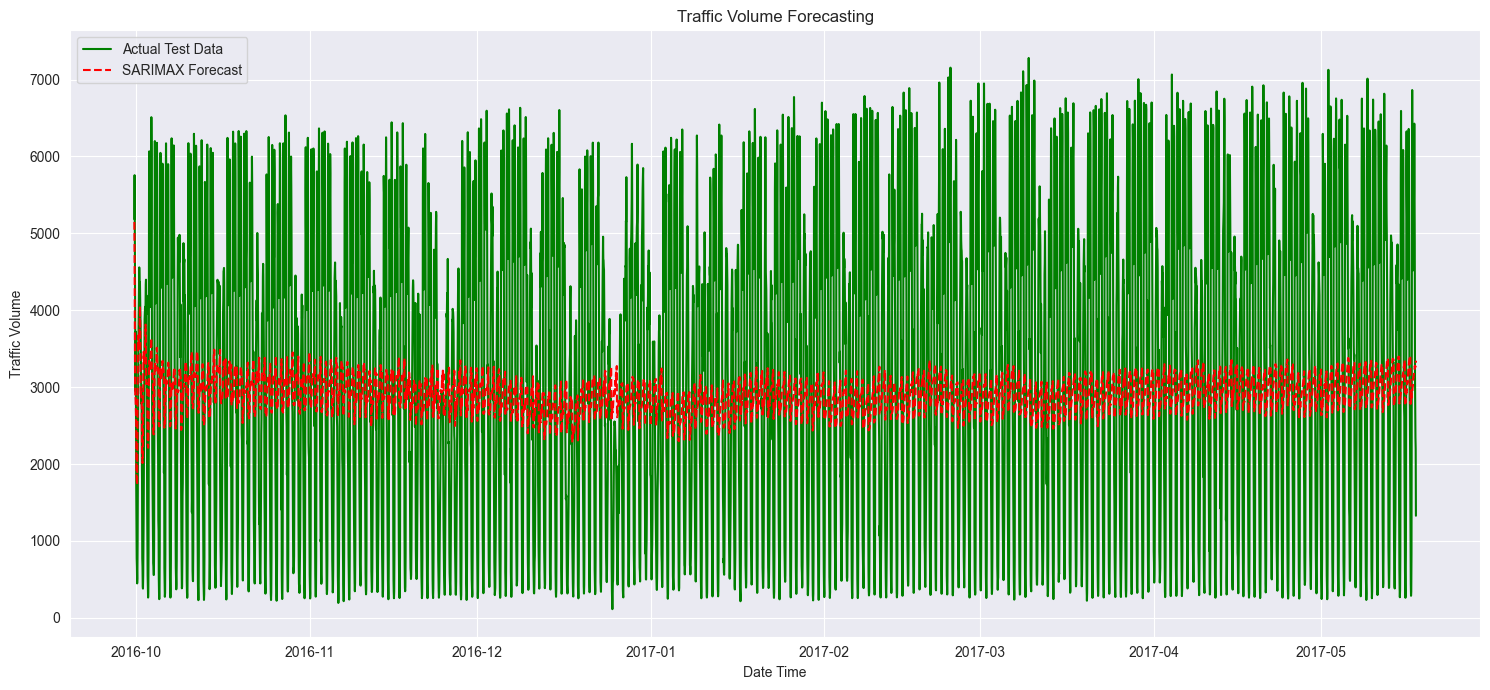

In [2]:
plt.figure(figsize=(15,7))
#plt.plot(train.index, train['traffic_volume'], label='Training Data', color='blue')
plt.plot(test.index, test['traffic_volume'], label='Actual Test Data', color='green')
plt.plot(test.index, forecast, label='SARIMAX Forecast', color='red', linestyle='dashed')
plt.title('Traffic Volume Forecasting')
plt.xlabel('Date Time')
plt.ylabel('Traffic Volume')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [3]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [4]:
# Actual and Predicted values
actual = test['traffic_volume']
predicted = forecast

# Mean Absolute Error (MAE)
mae = mean_absolute_error(actual, predicted)
print(f"Mean Absolute Error (MAE): {mae}")

# Mean Squared Error (MSE)
mse = mean_squared_error(actual, predicted)
print(f"Mean Squared Error (MSE): {mse}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Optionally, Mean Absolute Percentage Error (MAPE) - useful if you want the error in percentage terms
# Be cautious about using MAPE when actual values have zeros as this metric can become undefined
if not any(actual == 0):
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    print(f"Mean Absolute Percentage Error (MAPE): {mape}%")

Mean Absolute Error (MAE): 1681.264672855742
Mean Squared Error (MSE): 3639469.971760567
Root Mean Squared Error (RMSE): 1907.7394926353459


TypeError: '<' not supported between instances of 'Timestamp' and 'int'

In [1]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load data
df_raw = pd.read_csv('train.csv')
df_raw['date_time'] = pd.to_datetime(df_raw['date_time'])
df_raw['hour'] = df_raw['date_time'].dt.hour
df_raw.set_index('date_time', inplace=True)

# One-hot encoding for non-numeric categorical columns
df_is_holiday = pd.get_dummies(df_raw['is_holiday'], prefix='holiday')
df_weather_type = pd.get_dummies(df_raw['weather_type'], prefix='weather_type')
df_weather_description = pd.get_dummies(df_raw['weather_description'], prefix='weather_desc')

# Concatenate original dataframe with one-hot encodings
df_processed = pd.concat([df_raw, df_is_holiday, df_weather_type, df_weather_description], axis=1)

# Drop original non-numeric columns
df_processed.drop(columns=['is_holiday', 'weather_type', 'weather_description'], inplace=True)

# Splitting data
split_ratio = 0.8
split_point = int(len(df_raw) * split_ratio)
train = df_processed.iloc[:split_point]
test = df_processed.iloc[split_point:]

# Select and scale features
selected_features = ['traffic_volume', 'hour', 'temperature', 'clouds_all', 'humidity']
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train[selected_features])
test_scaled = scaler.transform(test[selected_features])

# Extract endogenous and exogenous data
exog_train = train[["hour", "clouds_all", "temperature", "snow_p_h"]]
exog_test = test[["hour", "clouds_all", "temperature", "snow_p_h"]]

# SARIMAX Model
model = SARIMAX(train['traffic_volume'], exog=exog_train, order=(2,1,2), seasonal_order=(2,0,2,12))
results = model.fit(disp=True)
forecast = results.predict(start=len(train), end=len(train)+len(test)-1, exog=exog_test)

C:\Users\Nadim Pramono\PycharmProjects\pythonProject1\v392\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Nadim Pramono\PycharmProjects\pythonProject1\v392\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Nadim Pramono\PycharmProjects\pythonProject1\v392\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Nadim Pramono\PycharmProjects\pythonProject1\v392\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Pred

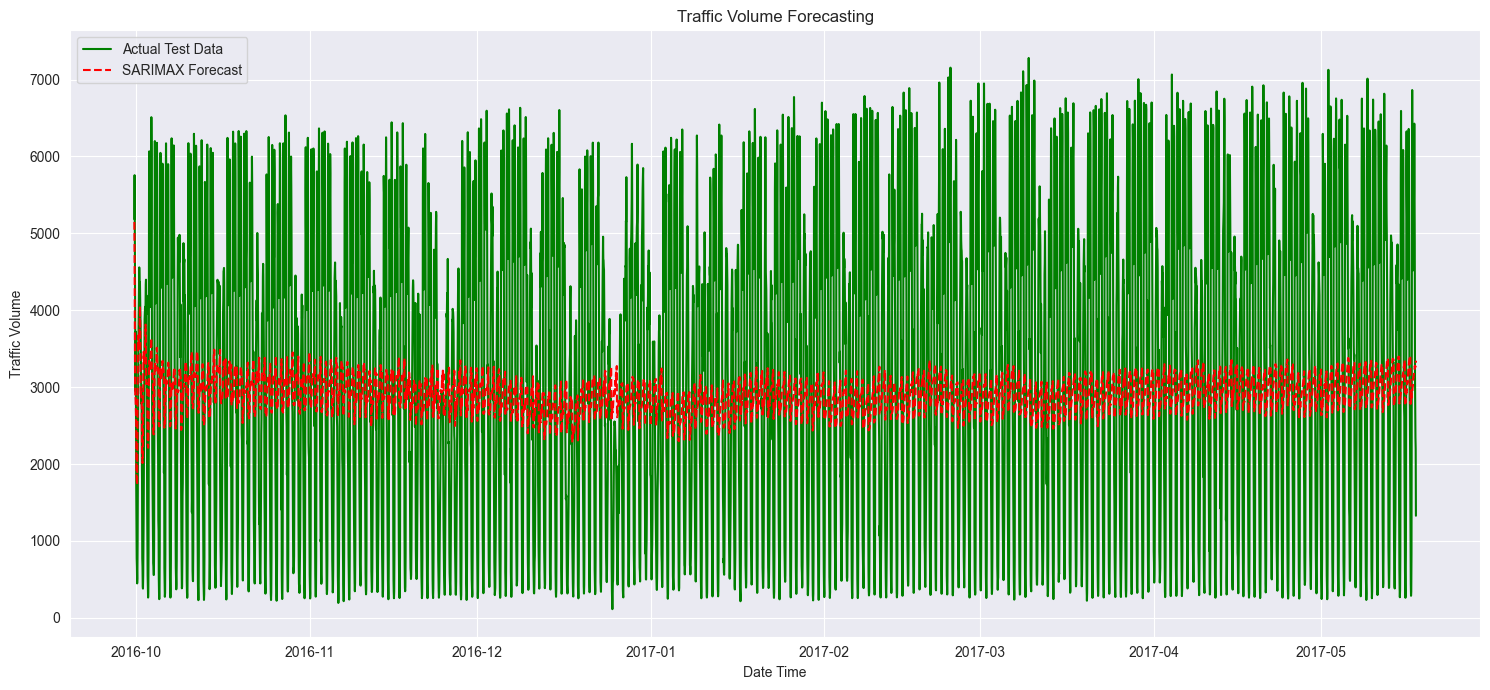

In [2]:
plt.figure(figsize=(15,7))
#plt.plot(train.index, train['traffic_volume'], label='Training Data', color='blue')
plt.plot(test.index, test['traffic_volume'], label='Actual Test Data', color='green')
plt.plot(test.index, forecast, label='SARIMAX Forecast', color='red', linestyle='dashed')
plt.title('Traffic Volume Forecasting')
plt.xlabel('Date Time')
plt.ylabel('Traffic Volume')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [3]:
# Actual and Predicted values
actual = test['traffic_volume']
predicted = forecast

# Mean Absolute Error (MAE)
mae = mean_absolute_error(actual, predicted)
print(f"Mean Absolute Error (MAE): {mae}")

# Mean Squared Error (MSE)
mse = mean_squared_error(actual, predicted)
print(f"Mean Squared Error (MSE): {mse}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Optionally, Mean Absolute Percentage Error (MAPE) - useful if you want the error in percentage terms
# Be cautious about using MAPE when actual values have zeros as this metric can become undefined
if not any(actual == 0):
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    print(f"Mean Absolute Percentage Error (MAPE): {mape}%")

NameError: name 'mean_absolute_error' is not defined